<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Filtering-known-outliers" data-toc-modified-id="Filtering-known-outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Filtering known outliers</a></span></li><li><span><a href="#Rarefy" data-toc-modified-id="Rarefy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Rarefy</a></span></li><li><span><a href="#Metadata-check" data-toc-modified-id="Metadata-check-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Metadata check</a></span><ul class="toc-item"><li><span><a href="#NAs?" data-toc-modified-id="NAs?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>NAs?</a></span></li></ul></li><li><span><a href="#Host-tree" data-toc-modified-id="Host-tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Host tree</a></span><ul class="toc-item"><li><span><a href="#Overlap-with-host-tree" data-toc-modified-id="Overlap-with-host-tree-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Overlap with host tree</a></span></li><li><span><a href="#Filtering-host-tree" data-toc-modified-id="Filtering-host-tree-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Filtering host tree</a></span><ul class="toc-item"><li><span><a href="#Writing-filtered-host-tree" data-toc-modified-id="Writing-filtered-host-tree-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Writing filtered host tree</a></span></li></ul></li><li><span><a href="#Expanding-host-tree-tips" data-toc-modified-id="Expanding-host-tree-tips-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Expanding host tree tips</a></span><ul class="toc-item"><li><span><a href="#Writing-tree" data-toc-modified-id="Writing-tree-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Writing tree</a></span></li></ul></li></ul></li><li><span><a href="#Writing-filtered-phyloseq" data-toc-modified-id="Writing-filtered-phyloseq-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Writing filtered phyloseq</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Filter and format data as needed

# Var

In [3]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/'

# 'raw' phyloseq of all samples
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq.RDS'
# full host tree of all animals in Georg's metadata
host_tree_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn.nwk'

# params
rarefy_depth = 5000
seed_num = 4853

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(ape)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 

# Load

In [5]:
# phyloseq object
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39903 taxa and 273 samples ]
sample_data() Sample Data:       [ 273 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 39903 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 39903 tips and 39154 internal nodes ]

In [6]:
# host tree
host_tree = read.tree(host_tree_file)
host_tree


Phylogenetic tree with 198 tips and 197 internal nodes.

Tip labels:
	Perca_fluviatilis, Gymnocephalus_cernua, Sander_lucioperca, Zingel_zingel, Neogobius_melanostomus, Esox_lucius, ...
Node labels:
	, @_22_@, @_8_@, @_4_@, @_3_@, @_1_@, ...

Rooted; includes branch lengths.

# Filtering known outliers

* Samples shown in preliminary analyses to be outliers
* Without more intra-species replicates, it's hard to determine if they are real or not
* To be conservative, I'm removing the samples

In [8]:
to_rm = c('X272.Black.Grouse', 'X284.Koala', 'X78.Indian.Gazelle')
physeq = phyloseq::subset_samples(physeq, ! sample_names(physeq) %in% to_rm)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39903 taxa and 270 samples ]
sample_data() Sample Data:       [ 270 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 39903 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 39903 tips and 39154 internal nodes ]

# Rarefy

In [9]:
# rarefy otu table
physeq = rarefy_even_depth(physeq, sample.size=rarefy_depth, rngseed=seed_num, replace=FALSE)
physeq

`set.seed(4853)` was used to initialize repeatable random subsampling.
Please record this for your records so others can reproduce.
Try `set.seed(4853); .Random.seed` for the full vector
...
57 samples removedbecause they contained fewer reads than `sample.size`.
Up to first five removed samples are: 

X104.European.RobinX112.Eurasian.SparrowhawkX113.Eurasian.WoodcockX121.Raccoon.DogX135.Horse	
...
9613OTUs were removed because they are no longer 
present in any sample after random subsampling

...


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

# Metadata check

In [32]:
# load metadata
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame 
metadata %>% nrow %>% print

metadata %>% status

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213
[1] 213 171


,X.SampleID,BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subject_id,host_german_name,host_common_name,⋯,wellplate_position_Illumina,Cornell_Dilution_DNA_Illumina,Num_Illumina,Num,sorting_454,comments_additional,DNA_box_20180622,sample_vol_20180622,sample_label_20180622,Description
X1.Eurasian.Beaver,X1.Eurasian.Beaver,ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Biber,Eurasian.Beaver,⋯,B12,4,120,18,18,NA,1,20,1,NA
X101.Horse,X101.Horse,ACGACGTCTTAG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0030,101,101,Hauspferd,Horse,⋯,E8,16,344,160,160,NA,2,20,101,NA
X102.Kulan,X102.Kulan,ACGAGTGCTATC,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0031,102,102,Khulan,Kulan,⋯,E9,16,345,161,161,NA,2,20,102,NA


In [34]:
# checks
metadata %>% 
    filter(grepl('gazell', scientific_name, ignore.case=TRUE)) %>%
    dplyr::select(-BarcodeSequence, -LinkerPrimerSequence, -Primer, -ReversePrimer)

X.SampleID,Barcode_ID,sample_number,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,⋯,wellplate_position_Illumina,Cornell_Dilution_DNA_Illumina,Num_Illumina,Num,sorting_454,comments_additional,DNA_box_20180622,sample_vol_20180622,sample_label_20180622,Description
X42.Goitered.Gazelle,338R_BC0086,42,42,Kropfgazelle,Goitered.Gazelle,Gazella_subgutturosa,NA,59529,Mammalia,⋯,E8,4,152,77,77,NA,1,20,42,NA


## NAs?

In [35]:
# columns in metadata table
metadata %>% colnames

[1] "X.SampleID"                           
  [2] "BarcodeSequence"                      
  [3] "LinkerPrimerSequence"                 
  [4] "Primer"                               
  [5] "ReversePrimer"                        
  [6] "Barcode_ID"                           
  [7] "sample_number"                        
  [8] "host_subject_id"                      
  [9] "host_german_name"                     
 [10] "host_common_name"                     
 [11] "scientific_name"                      
 [12] "scientific_name_subspecies"           
 [13] "host_taxid"                           
 [14] "class"                                
 [15] "order"                                
 [16] "family"                               
 [17] "genus"                                
 [18] "sample_type"                          
 [19] "sex"                                  
 [20] "pregnant_animal"                      
 [21] "age"                                  
 [22] "age_unit"                             
 [23] "tot_mass"                             
 [24] "height_or_length"                     
 [25] "host_body_temp"                       
 [26] "disease_stat"                         
 [27] "medication"                           
 [28] "body_habitat"                         
 [29] "body_product"                         
 [30] "No_individuals"                       
 [31] "species_replicates"                   
 [32] "indiv_coreset"                        
 [33] "duplicates_group"                     
 [34] "duplicates_common_name"               
 [35] "pass_fail_info"                       
 [36] "coreset"                              
 [37] "indiv_variablity"                     
 [38] "population_species"                   
 [39] "bPCR_variability_test"                
 [40] "DNA_extr_exp_test"                    
 [41] "cycles_test"                          
 [42] "ruminant"                             
 [43] "pseudoruminants"                      
 [44] "wild_domesticated"                    
 [45] "captive_wild"                         
 [46] "captive_wild_exp"                     
 [47] "captive_origin"                       
 [48] "geo_loc_name"                         
 [49] "country"                              
 [50] "region"                               
 [51] "location"                             
 [52] "location_detail"                      
 [53] "latitude"                             
 [54] "longitude"                            
 [55] "elev"                                 
 [56] "geo_feature"                          
 [57] "geo_feature_detail_1"                 
 [58] "geo_feature_detail_2"                 
 [59] "geo_feature_detail_3"                 
 [60] "geo_feature_detail_4"                 
 [61] "habitat"                              
 [62] "habitat_detail"                       
 [63] "habitat_detail_1"                     
 [64] "habitat_detail_2"                     
 [65] "biome"                                
 [66] "diet"                                 
 [67] "diet_detail"                          
 [68] "diet_breadth"                         
 [69] "diet_breadth_gabrielle"               
 [70] "diet_vertebrate"                      
 [71] "diet_invertebrate"                    
 [72] "diet_fruit"                           
 [73] "diet_flowers_nectar_pollen"           
 [74] "diet_leaves_branches_bark_buds"       
 [75] "diet_seeds"                           
 [76] "diet_grass_waterplants"               
 [77] "diet_roots_tubers"                    
 [78] "digestive_system"                     
 [79] "digestive_system_detail"              
 [80] "feeding_style"                        
 [81] "temp_regulation"                      
 [82] "last_meal_or_actual_feed"             
 [83] "collection_date"                      
 [84] "season"                               
 [85] "freezing_date"                        
 [86] "samp_store_temp"                      
 [87] "extraction_date_2"                    


In [36]:
# taxonomy
cols = c('class', 'order', 'family', 'genus', 'scientific_name')
metadata[,cols] %>% summary

            class                order          family        genus    
 Actinopterygii:  9   Artiodactyla  :43   Cervidae : 17   Cervus : 13  
 Amphibia      :  5   Carnivora     :29   Bovidae  : 15   Equus  : 10  
 Aves          : 30   Primates      :16   Canidae  : 10   Lepus  :  8  
 Mammalia      :160   Rodentia      :16   Equidae  : 10   Canis  :  7  
 Reptilia      :  9   Perissodactyla:14   Leporidae: 10   Capra  :  5  
                      Lagomorpha    :10   Felidae  :  9   Sus    :  5  
                      (Other)       :85   (Other)  :142   (Other):165  
        scientific_name
 Cervus_elaphus : 11   
 Lepus_europaeus:  7   
 Canis_lupus    :  6   
 Sus_scrofa     :  5   
 Equus_hemionus :  4   
 Felis_catus    :  4   
 (Other)        :176   

In [37]:
# diet
cols = c('diet', 'diet_detail', 'diet_breadth', 'diet_breadth_gabrielle', 
         'diet_vertebrate', 'diet_invertebrate', 'diet_fruit', 
         'diet_flowers_nectar_pollen', 'diet_leaves_branches_bark_buds', 
         'diet_seeds', 'diet_grass_waterplants', 'diet_roots_tubers')
metadata[,cols] %>% summary

        diet                diet_detail   diet_breadth diet_breadth_gabrielle
 carnivore:66   mainly insectivore:  8   1      : 24   2      :64            
 herbivore:87   insectivore       :  4   2      : 21   4      :41            
 omnivore :60   mainly herbivore  :  4   5      : 15   1      :35            
                piscivore         :  3   3      : 10   3      :34            
                mainly carnivore  :  2   6      :  6   5      :30            
                (Other)           :  5   (Other):  6   7      : 4            
                NA's              :187   NA's   :131   (Other): 5            
 diet_vertebrate             diet_invertebrate diet_fruit
 no :138         no                   :104     no :124   
 yes: 75         yes                  :108     yes: 89   
                 yes mainly young ones:  1               
                                                         
                                                         
                            

In [38]:
# feeding/digestion
cols = c('digestive_system', 'digestive_system_detail', 'feeding_style')
metadata[,cols] %>% summary

                      digestive_system                  digestive_system_detail
 simple                       :52      simple                       :52        
 hindgut                      :51      hindgut                      :51        
 foregut                      :49      foregut                      :49        
 fermentation activity foregut: 5      fermentation activity foregut: 5        
 hindgut_simple               : 3      hindgut_simple               : 3        
 (Other)                      : 3      (Other)                      : 3        
 NA's                         :50      NA's                         :50        
                  feeding_style
 bulk and roughage eaters:  6  
 caecotroph              : 13  
 concentrate selector    :  2  
 concentrate selectors   :  4  
 intermediate  type      : 10  
 intermediate type       : 15  
 NA's                    :163  

In [39]:
# habitat
cols = c('habitat', 'habitat_detail', 'habitat_detail_1', 'habitat_detail_2')
metadata[,cols] %>% summary

                                   habitat                  habitat_detail
 anthropogenic habitat                 : 11   anthropogenic habitat:11    
 aquatic habitat                       : 16   cultivated habitat   :10    
 terrestrial habitat                   :177   freshwater habitat   : 9    
 terrestrial habitat_cultivated habitat:  9   grassland            :33    
                                              saline water habitat : 7    
                                              terrestrial habitat  :95    
                                              woodland             :48    
              habitat_detail_1              habitat_detail_2
 terrestrial habitat  :95      terrestrial habitat  :95     
 forest               :48      forest               :48     
 meadow               :15      flood meadow         :15     
 steppe               :12      steppe               :12     
 anthropogenic habitat:11      anthropogenic habitat:11     
 cultivated habitat   :10      cul

In [40]:
# geography
cols = c('geo_loc_name', 'country', 'region', 'location', 'location_detail', 'latitude', 'longitude', 'elev')
metadata[,cols] %>% summary

                                        geo_loc_name         country   
 Austria:Vienna:Vienna                        : 50   Austria     :125  
 Austria:Lower Austria:NA                     : 11   Australia   : 12  
 Hungary:Central Hungary:Budapest Surroundings:  9   South Africa: 12  
 Austria:Lower Austria:Schrems                :  8   Viet Nam    : 12  
 Austria:Burgenland:NA                        :  7   Hungary     : 11  
 East Africa:NA:NA                            :  7   (Other)     : 36  
 (Other)                                      :121   NA's        :  5  
             region                      location              location_detail
 Vienna         :50   Vienna                 :50   Lobau               : 14   
 Lower Austria  :41   Budapest Surroundings  : 9   Krueger-Nationalpark: 11   
 Burgenland     :14   Schrems                : 8   Schoenbrunn         : 11   
 South Australia:12   Cat Tien National Park : 6   Zoo Herberstein     :  6   
 Central Hungary:11   Cuc phu

In [41]:
# time
cols = c('collection_date', 'season')
metadata[,cols] %>% summary

 collection_date        season  
 12/15/12:  8    summer    :73  
 9/18/11 :  8    autumn    :59  
 6/23/12 :  6    spring    :39  
 10/11/12:  5    winter    :17  
 11/1/13 :  5    dry season:10  
 12/15/13:  5    (Other)   :12  
 (Other) :176    NA's      : 3  

In [42]:
# misc
cols = c('wild_domesticated', 'captive_wild', 'captive_origin', 'sample_type')
metadata[,cols] %>% summary

    wild_domesticated  captive_wild          captive_origin sample_type
 domesticated: 17     captive: 39   Schoenbrunn     : 10    feces:199  
 wild        :196     human  :  4   Zoo Herberstein :  6    gut  : 14  
                      wild   :170   KLIVV           :  3               
                                    FIWI            :  2               
                                    Gehege Esterhazy:  2               
                                    (Other)         :  3               
                                    NA's            :187               

# Host tree

## Overlap with host tree

* Note: host tree is for all samples in the entire animal microbiome dataset

In [43]:
# in host tree, but not in 16S microbiome data?
setdiff(host_tree$tip.label, metadata$scientific_name) %>% print

 [1] "Perca_fluviatilis"           "Gymnocephalus_cernua"       
 [3] "Zingel_zingel"               "Neogobius_melanostomus"     
 [5] "Salmo_trutta"                "Oncorhynchus_mykiss"        
 [7] "Silurus_glanis"              "Chondrostoma_nasus"         
 [9] "Leuciscus_cephalus"          "Rutilus_rutilus"            
[11] "Alburnus_alburnus"           "Scardinius_erythrophthalmus"
[13] "Vimba_vimba"                 "Abramis_brama"              
[15] "Barbus_barbus"               "Salamandra_salamandra"      
[17] "Salamandra_atra"             "Rana_temporaria"            
[19] "Pogona_vitticeps"            "Anguis_fragilis"            
[21] "Varanus_rosenbergi"          "Lacerta_agilis"             
[23] "Lyrurus_tetrix"              "Phasianus_colchicus"        
[25] "Cygnus_olor"                 "Branta_bernicla"            
[27] "Anas_crecca"                 "Alcedo_atthis"              
[29] "Eolophus_roseicapilla"       "Strix_aluco"                
[31] "Phylloscopus_collyb

In [44]:
# in 16S microbiome data, but not in host tree (PROBLEM!)
setdiff(metadata$scientific_name, host_tree$tip.label) %>% print

character(0)


## Filtering host tree

In [45]:
to_rm = setdiff(host_tree$tip.label, metadata$scientific_name)
host_tree_prn = drop.tip(host_tree, to_rm)
host_tree_prn


Phylogenetic tree with 128 tips and 127 internal nodes.

Tip labels:
	Sander_lucioperca, Esox_lucius, Salvelinus_fontinalis, Aspius_aspius, Leuciscus_idus, Blicca_bjoerkna, ...
Node labels:
	, @_22_@, @_8_@, @_7_@, @_20_@, @_17_@, ...

Rooted; includes branch lengths.

In [46]:
# in host tree, but not in 16S microbiome?
setdiff(host_tree_prn$tip.label, metadata$scientific_name) %>% print

character(0)


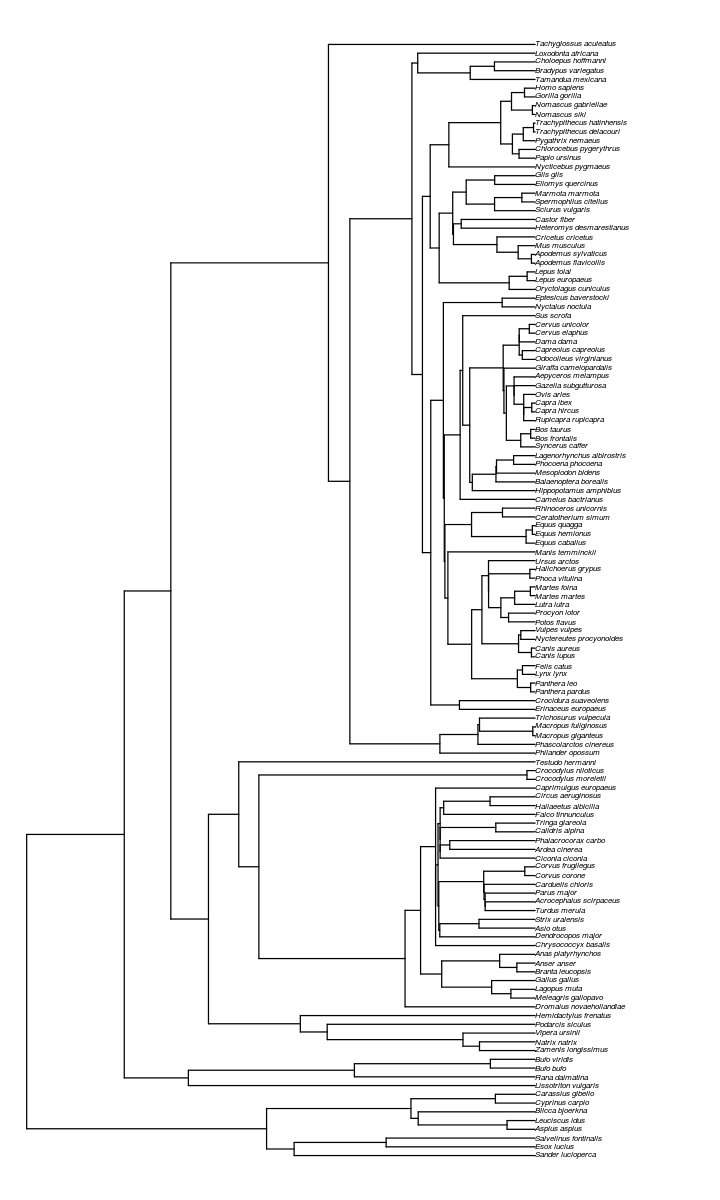

In [47]:
# plotting tree
options(repr.plot.width=6, repr.plot.height=10)
plot(host_tree_prn, no.margin=TRUE, cex=0.4)

### Writing filtered host tree

* `SpecD` = one tip per species
* Writing to 16S directory, because it is now tailored to the 16S 

In [48]:
# writing host tree
host_tree_r5k_file = paste0(tools::file_path_sans_ext(host_tree_file), '_16S-r5k_SpecD.nwk')
write.tree(host_tree_prn, file=host_tree_r5k_file)
cat('File written:', host_tree_r5k_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_SpecD.nwk 


## Expanding host tree tips

* Expand to all tips
* `IndD` = one tip per individual animal

In [49]:
# tip label <--> node id
df_nodes = data.frame(label = host_tree_prn$tip.label,
                      node = 1:length(host_tree_prn$tip.label))

# adding all host_subj_id
df_nodes = df_nodes %>%
    inner_join(metadata %>% dplyr::select(X.SampleID, scientific_name), 
               c('label'='scientific_name')) %>%
    as.data.frame

# status
df_nodes %>% status

Warning message:
“Column `label`/`scientific_name` has different attributes on LHS and RHS of join”

[1] 213   3


label,node,X.SampleID
Sander_lucioperca,1,X256.Zander
Esox_lucius,2,F302.Northern.Pike
Salvelinus_fontinalis,3,X188.Brook.Trout


In [50]:
# adding new tips
tree_exp = host_tree_prn
map_tmp = metadata 

for(lab in unique(df_nodes$label)){
    # creating polytomy tree
    samps = df_nodes[df_nodes$label == lab,]
    x = paste(samps$X.SampleID, collapse=',')
    x = paste0('(', x, ');')
    tree_poly = read.tree(text = x)
    # adding branch lengths 
    tree_poly = compute.brlen(tree_poly, 1e-10)
    
    # getting current node --> label structure
    df_tmp = data.frame(label = tree_exp$tip.label,
                        node = 1:length(tree_exp$tip.label))
    
    # getting node corresponding to tip label 
    x = 1:length(tree_exp$tip.label)
    node = x[which(tree_exp$tip.label==lab)] 

    # adding subtree to main tree
    tree_exp = bind.tree(tree_exp, tree_poly, where=node)
}

tree_exp


Phylogenetic tree with 213 tips and 177 internal nodes.

Tip labels:
	X256.Zander, F302.Northern.Pike, X188.Brook.Trout, F300.Asp, X330.Ide, X125.Common.Carp, ...
Node labels:
	, @_22_@, @_8_@, @_7_@, @_20_@, @_17_@, ...

Rooted; includes branch lengths.

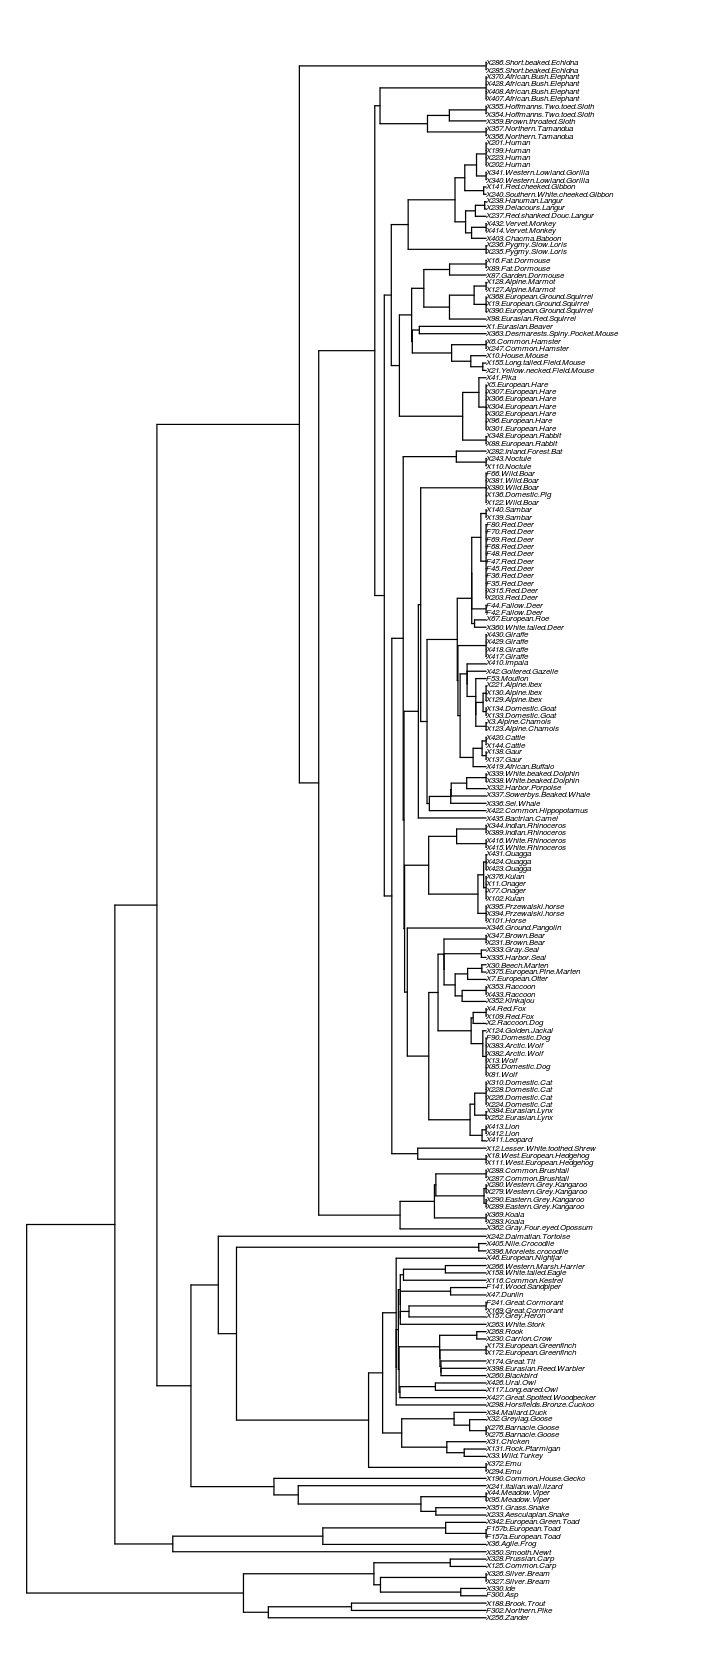

In [51]:
# plotting tree
options(repr.plot.width=6, repr.plot.height=14)
plot(tree_exp, no.margin=TRUE, cex=0.4)

### Writing tree

In [52]:
# writing host tree
host_tree_r5k_exp_file = paste0(tools::file_path_sans_ext(host_tree_file), '_16S-r5k_IndD.nwk')
write.tree(tree_exp, file=host_tree_r5k_exp_file)
cat('File written:', host_tree_r5k_exp_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20180625_rn_16S-r5k_IndD.nwk 


# Writing filtered phyloseq

In [53]:
# summary
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [54]:
# saving
physeq_r5k_file = paste0(tools::file_path_sans_ext(physeq_file), '_r5k.RDS')
saveRDS(physeq, file=physeq_r5k_file)
cat('File written:', physeq_r5k_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS 


# sessionInfo

In [55]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.4 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2    ape_5.1         phyloseq_1.22.3 ggplot2_2.2.1  
[5] tidyr_0.8.1     dplyr_0.7.4    

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-1        repr_0.12.0         purrr_0.2.4        